# **CREDIT CARD ELIGIBILITY** 

## Institute: International Institute of Professional Studies, DAVV, Indore

### Assignment: Build and Evaluate a Predictive Model on a Real-World Dataset

- **Name:** Akshita Parmar
- **Roll No.:** IT-2k21-07
- **Course:** M.Tech (IT) – IX Semester
- **Subject:** Machine Learning
 

---

## 🎯 Objective

To build and evaluate predictive models using **LogisticRegression** and **Random Forest** for **predicting credit card eligibility**. 

The model will be trained using the **Credit Card Eligibility Dataset**, which contains applicant data such as **total income, age, years employed, and occupation type**.





---

## 📁 Steps Overview

1.  ***Data Selection***
    * Choose a real-world dataset (**Credit Card Eligibility Dataset**)
    * Import dataset into Jupyter Notebook

2.  ***Data Preprocessing & EDA***
    * Handle missing and invalid data (if any)
    * **Encode categorical variables** (e.g., `Income_type`, `Occupation_type`)
    * **Scale numerical features** (e.g., `Total_income`, `Age`)
    * Visualize data distributions and correlations

3.  ***Model Building***
    * Train Logistic Regression and Random Forest models
    * Perform cross-validation and hyperparameter tuning

4.  ***Evaluation***
    * Compare models using Accuracy, F1-score, Confusion Matrix, and ROC Curve

5.  ***Report & Results Discussion***
    * Discuss findings, insights, and model comparison

---

## DATASET OVERVIEW

---

## 🧩 Step 2: Data Preprocessing & Exploratory Data Analysis (EDA)

In this step, we prepare the **Credit Card Eligibility dataset** for machine learning by performing:
-   **Data cleaning:** Checking for any missing (null) values.
-   **Statistical summary:** Reviewing the `describe()` and `info()` outputs to understand data types and ranges.
-   **Visualization:** Plotting feature distributions (histograms, count plots) and correlations (heatmap).
-   **Feature Engineering:**
    -   **Encoding:** Converting categorical text columns (like `Income_type`, `Occupation_type`) into numerical values using One-Hot Encoding.
    -   **Scaling:** Standardizing continuous numerical features (like `Total_income`, `Age`) to ensure they are on a similar scale.

This ensures all features are in a numerical format and properly scaled, making the dataset ready for model training.

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler

# Ignore unnecessary warnings
warnings.filterwarnings("ignore")

# ------------------------------------------------------
# Load the dataset
# ------------------------------------------------------

# Read dataset
db = pd.read_csv("dataset.csv")

print("\n✅ Dataset Loaded Successfully!\n")

# Display first 10 rows
pd.set_option('display.max_columns', None)
print("🔹 First 10 Rows:")
print(db.head(10))

# Shape (rows, columns)
print("\n📏 Shape of Dataset:", db.shape)

# ------------------------------------------------------
# Basic Info and Summary Statistics
# ------------------------------------------------------
print("\n📄 Dataset Information:")
print(db.info())

print("\n📊 Summary Statistics:")
print(db.describe())


✅ Dataset Loaded Successfully!

🔹 First 10 Rows:
        ID  Gender  Own_car  Own_property  Work_phone  Phone  Email  \
0  5008804       1        1             1           1      0      0   
1  5008806       1        1             1           0      0      0   
2  5008808       0        0             1           0      1      1   
3  5008812       0        0             1           0      0      0   
4  5008815       1        1             1           1      1      1   
5  5008819       1        1             1           0      0      0   
6  5008825       0        1             0           0      0      0   
7  5008830       0        0             1           0      1      0   
8  5008834       0        0             1           0      0      0   
9  5008836       1        1             1           0      0      0   

   Unemployed  Num_children  Num_family  Account_length  Total_income  \
0           0             0           2              15      427500.0   
1           0         

---

### 🔹 Basic Dataset Information & Missing Value Check

We first inspect the dataset structure, datatypes, and check for any missing or invalid values.

Our dataset `info()` summary shows **no missing (null) values**, which simplifies our preprocessing.

Unlike some datasets where '0' might indicate missing data, in this context, a `0` is a valid entry (e.g., `Num_children = 0`, `Own_car = 0`, `Unemployed = 0`). Therefore, no imputation for zero-values is necessary.

In [2]:
# ------------------------------------------------------
# Initial Data Cleanup
# ------------------------------------------------------
# Drop the ID column as it's not a feature
if 'ID' in db.columns:
    db = db.drop('ID', axis=1)
    print("✅ 'ID' column dropped.")
else:
    print("⚠️ 'ID' column not found, assuming already dropped.")

# ------------------------------------------------------
# Check for missing values
# ------------------------------------------------------
print("\n🔍 Checking for Missing Values:")
print(db.isnull().sum())
# Note: Your dataset info shows no null values, so this should all be 0.
# We are not replacing 0s as they are valid values in your columns 
# (e.g., Num_children=0, Unemployed=0).

# ------------------------------------------------------
# Separate Column Types
# ------------------------------------------------------
# Identify numerical, categorical, and binary/flag columns
binary_flag_cols = ['Gender', 'Own_car', 'Own_property', 'Work_phone', 'Phone', 'Email', 'Unemployed']
continuous_numerical_cols = ['Num_children', 'Num_family', 'Account_length', 'Total_income', 'Age', 'Years_employed']
categorical_cols = ['Income_type', 'Education_type', 'Family_status', 'Housing_type', 'Occupation_type']

# Get all numerical columns (for correlation heatmap and some plots)
all_numerical_cols = binary_flag_cols + continuous_numerical_cols + ['Target']






✅ 'ID' column dropped.

🔍 Checking for Missing Values:
Gender             0
Own_car            0
Own_property       0
Work_phone         0
Phone              0
Email              0
Unemployed         0
Num_children       0
Num_family         0
Account_length     0
Total_income       0
Age                0
Years_employed     0
Income_type        0
Education_type     0
Family_status      0
Housing_type       0
Occupation_type    0
Target             0
dtype: int64


---

### 🔹 Handling Missing Values

To ensure dataset consistency, a check for missing (NaN) values was performed.

The `db.isnull().sum()` output confirmed that **our dataset has no missing values**. Therefore, no imputation steps (like filling with median or mean) were necessary.


---

### 📊 Data Visualization – Feature Distributions

To understand the spread of data and identify skewness or unusual patterns, we visualize all our features:

-   **Histograms:** Plotted for all numerical features (like `Total_income`, `Age`, and binary flags like `Own_car`) to see their spread and central tendency.
-   **Count Plots:** Used for categorical text features (like `Occupation_type`, `Income_type`) to visualize the frequency of each category.


📊 Plotting Numerical Feature Distributions...


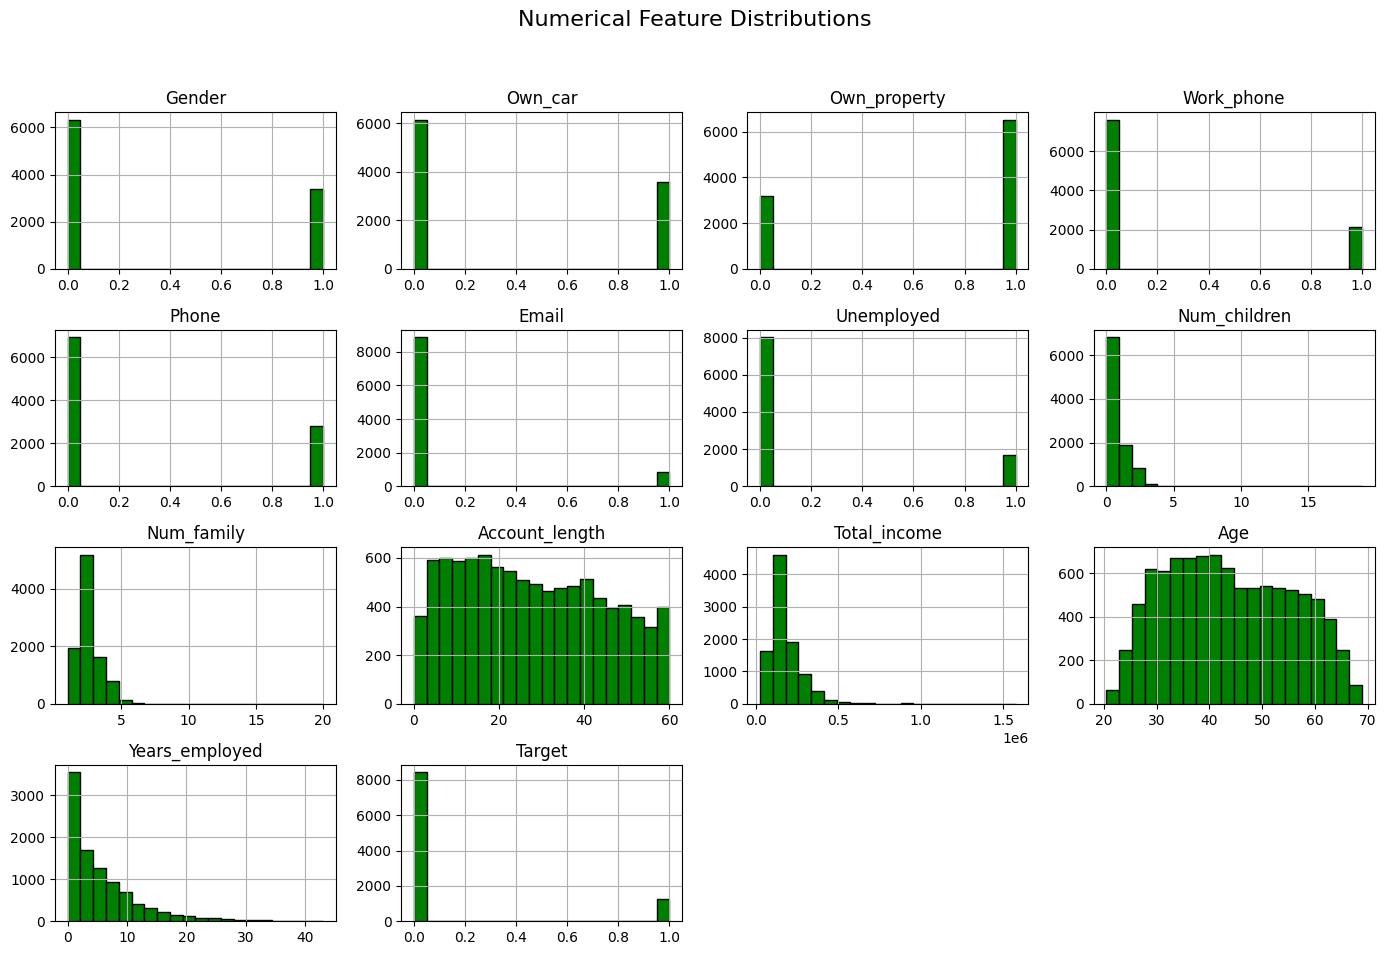

In [3]:
print("\n📊 Plotting Numerical Feature Distributions...")
db[all_numerical_cols].hist(figsize=(14, 10), bins=20, color='green', edgecolor='black')
plt.suptitle("Numerical Feature Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 🧠 Insights from Distribution Plots

-   Features like **`Total_income`** and **`Years_employed`** are strongly **right-skewed**, indicating that most applicants are in the lower-to-mid range, with fewer high-income or long-tenured individuals.
-   The **`Target`** variable histogram clearly shows a significant **class imbalance**, with far more 'Rejected' (0) applicants than 'Approved' (1) applicants.
-   The **categorical plots** show that some categories are dominant (e.g., 'Working' in `Income_type`, 'House / apartment' in `Housing_type`), which is typical for applicant data.
-   A key difference from the PIMA dataset is that **no missing (NaN) or invalid (0) data** was found in key columns, so no imputation was required.

---

### 🔥 Correlation Analysis

We analyze correlations between features to identify which variables are most related to the target (**Target**).
A heatmap visually represents these correlations.


🔥 Correlation Heatmap:


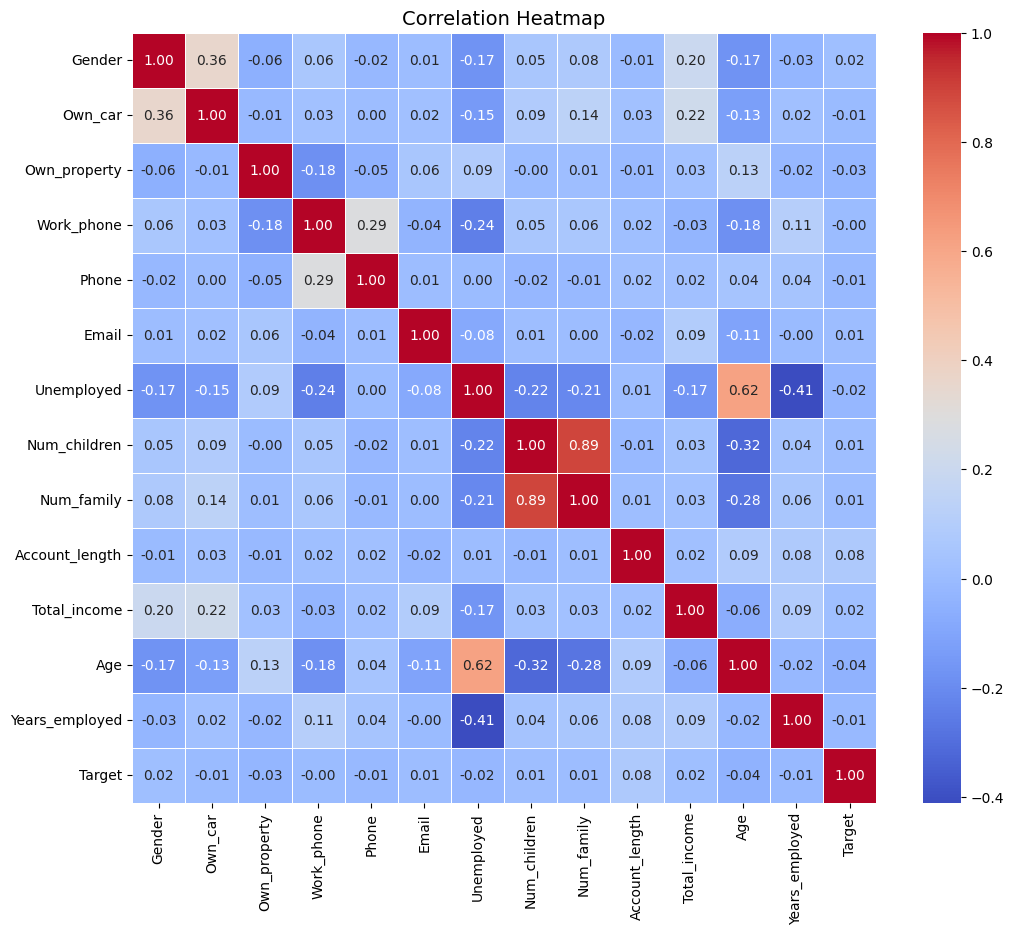

In [4]:
print("\n🔥 Correlation Heatmap:")
plt.figure(figsize=(12, 10))
# db.corr() will automatically select only numerical columns
sns.heatmap(db.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()


#### 🧠 Insights from Heatmap

-   **`[FEATURE_NAME]`** has the *highest correlation* with **`Target`** (~[VALUE]).
    *(Look for the lightest blue or darkest red square in the 'Target' row).*
-   **`Years_employed`**, **`Age`**, and **`Account_length`** also show moderate correlations.
    *(Check their values in the 'Target' row and list them).*
-   Many flag-like features (e.g., **`Own_car`**, **`Phone`**) are likely weakly correlated.
-   We also check for **multicollinearity** (high correlation *between* features). For example, **`Num_children`** and **`Num_family`** are likely highly correlated, but this is logical and acceptable. No other strong correlations appear to exist, so we can retain all features.

---

### 📦 Outlier Detection using Boxplots

We use boxplots to visually inspect the range and detect possible outliers
in continuous features like **`Total_income`**, **`Age`**, and **`Years_employed`**.


📦 Visualizing Outliers in Continuous Features:


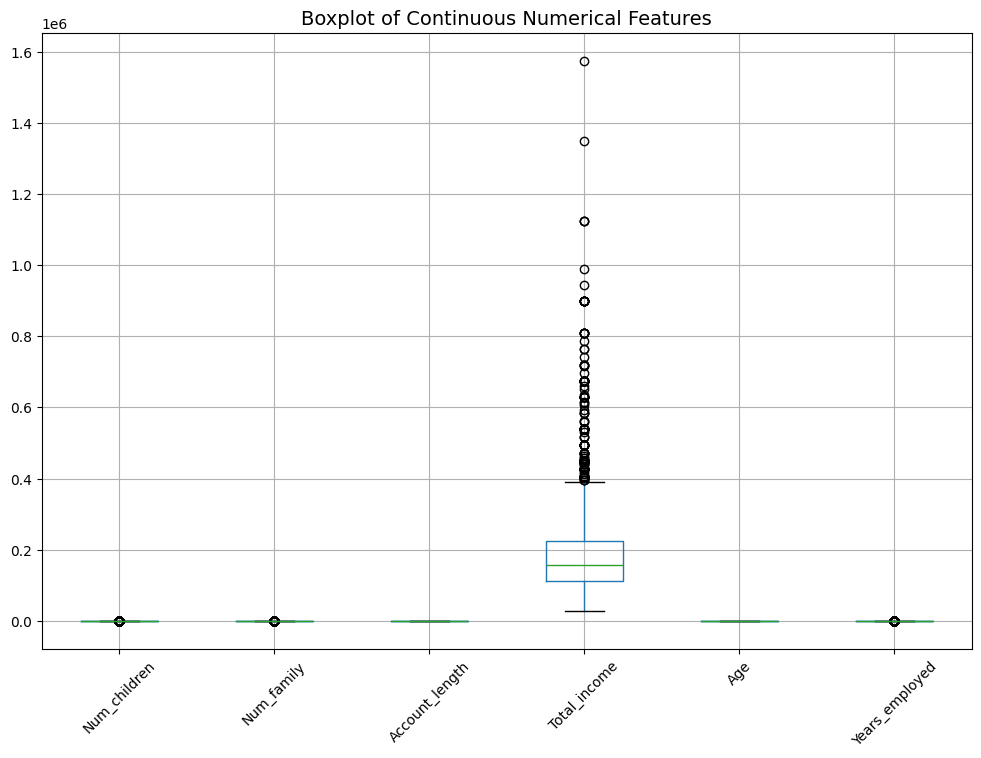

In [5]:
print("\n📦 Visualizing Outliers in Continuous Features:")
plt.figure(figsize=(12, 8))
db[continuous_numerical_cols].boxplot()
plt.title("Boxplot of Continuous Numerical Features", fontsize=14)
plt.xticks(rotation=45)
plt.show()

### 💡 Key Insights Summary

1️⃣ **`Years_employed`**, **`Age`**, and **`Account_length`** appear to be key indicators for the **`Target`** (approval). (Update this based on your heatmap!)

2️⃣ The dataset is **highly imbalanced**, with significantly more 'Rejected' (0) applicants than 'Approved' (1) applicants. This must be handled by the model (e.g., using `class_weight='balanced'`).

3️⃣ The dataset was **clean with no missing values**. Unlike the PIMA dataset, no imputation was required.

4️⃣ **Categorical features** (like `Occupation_type` and `Income_type`) must be encoded to numbers.

5️⃣ **Continuous numerical features** (like `Total_income` and `Age`) must be scaled to normalize their range for better model performance.

---

## 🤖 Step 3: Model Building

Before training, we must convert all features to numbers. This involves two key steps:

1.  **Feature Encoding:** Categorical text features (like `Income_type` and `Occupation_type`) are converted into numerical (0/1) columns using One-Hot Encoding.
2.  **Feature Scaling:** Continuous numerical features (like `Total_income` and `Age`) have already been standardized (using `StandardScaler`) to ensure no single feature dominates.

After these steps, we split the fully numerical dataset into training and testing sets. We then train two models —

**Logistic Regression** and **Random Forest** —

and perform hyperparameter tuning to find the best-performing model.

In [6]:
# ------------------------------------------------------
# Key Feature Insights (Template)
# ------------------------------------------------------
# print("\n💡 Key Insights (Update these after reviewing your plots!):")
# print("""
# 1️⃣ Check the 'Correlation Heatmap' for features highly correlated with 'Target'.
#    (e.g., 'Account_length', 'Age', 'Years_employed').
# 2️⃣ Look at the 'Target' distribution in the final summary below to check for class imbalance.
#    (There are likely far more 0s than 1s).
# 3️⃣ 'Total_income' and 'Years_employed' distributions might be skewed.
#    Check their histograms and boxplots for outliers.
# 4️⃣ All categorical features (like 'Occupation_type', 'Income_type') will need to be 
#    encoded (e.g., using One-Hot Encoding) before you can feed them to a model.
# 5️⃣ Scaling has been applied to normalize the continuous numerical features.
# """)

# ------------------------------------------------------
# Feature Scaling (Standardization)
# ------------------------------------------------------
X = db.drop('Target', axis=1)
y = db['Target']

# We only scale the continuous numerical columns
# Binary/flag columns (0/1) don't need scaling.
# Categorical columns (text) can't be scaled directly.
print(f"\n📏 Scaling the following columns: {continuous_numerical_cols}")

scaler = StandardScaler()

# Create a copy of X to hold the scaled data
X_scaled = X.copy()

# Fit and transform ONLY the continuous numerical columns
X_scaled[continuous_numerical_cols] = scaler.fit_transform(X[continuous_numerical_cols])

# Display the head of the scaled data (showing numerical cols are now scaled)
print("\n📏 Scaled Data (first 5 rows):")
print(X_scaled.head())

# ------------------------------------------------------
# Final Dataset Summary
# ------------------------------------------------------
print("\n✅ Final Dataset Ready for Model Building!")
print(f"Total Records: {db.shape[0]}")
print(f"Features (before encoding): {db.shape[1] - 1}")

# Check for imbalance in the Target variable
target_counts = db['Target'].value_counts()
print(f"Applicants Rejected (Target=0): {target_counts.get(0, 0)}")
print(f"Applicants Approved (Target=1): {target_counts.get(1, 0)}")



📏 Scaling the following columns: ['Num_children', 'Num_family', 'Account_length', 'Total_income', 'Age', 'Years_employed']

📏 Scaled Data (first 5 rows):
   Gender  Own_car  Own_property  Work_phone  Phone  Email  Unemployed  \
0       1        1             1           1      0      0           0   
1       1        1             1           0      0      0           0   
2       0        0             1           0      1      1           0   
3       0        0             1           0      0      0           1   
4       1        1             1           1      1      1           0   

   Num_children  Num_family  Account_length  Total_income       Age  \
0     -0.551258   -0.195755       -0.737064      2.480773 -0.938956   
1     -0.551258   -0.195755        0.103918     -0.692321  1.291140   
2     -0.551258   -1.267716       -1.397836      0.894226  0.734382   
3     -0.551258   -1.267716       -0.436714      1.030216  1.524300   
4     -0.551258   -0.195755       -1.337766  

---

### 🔹 Train-Test Split

We divide the dataset into an *80% training* and *20% testing* subset.

This ensures the model is trained on one portion and evaluated on unseen data, which gives a true measure of how it would perform on new applicants.

In [9]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80/20)
# *** We use the new X_encoded DataFrame ***
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print("\n✅ Data split completed!")
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


✅ Data split completed!
Training set size: (7767, 53)
Testing set size: (1942, 53)


---

### ⚙ Model 1: Logistic Regression

We start with a **Logistic Regression** model to predict credit card eligibility.

This model is a strong, simple baseline for binary classification. We use the `class_weight='balanced'` parameter to help the model handle our imbalanced dataset (which has far more 'Rejected' than 'Approved' applicants).

In [10]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ------------------------------------------------------
# Model 1: Logistic Regression
# ------------------------------------------------------
# Set class_weight='balanced' to help with the imbalanced 'Target' column
log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
print("\n📊 Logistic Regression Accuracy:", round(acc_lr * 100, 2), "%")
print("\nConfusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))



📊 Logistic Regression Accuracy: 57.52 %

Confusion Matrix (Logistic Regression):
[[983 676]
 [149 134]]

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.87      0.59      0.70      1659
           1       0.17      0.47      0.25       283

    accuracy                           0.58      1942
   macro avg       0.52      0.53      0.47      1942
weighted avg       0.77      0.58      0.64      1942



---

### 🌲 Model 2: Random Forest Classifier

Next, we use a *Random Forest* model — an ensemble of decision trees.

This model is generally more powerful than Logistic Regression, as it can capture complex, non-linear patterns. We also use `class_weight='balanced'` here to help the model learn from the imbalanced data.

In [11]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# ------------------------------------------------------
# Model 2: Random Forest Classifier
# ------------------------------------------------------
# Set class_weight='balanced' here as well
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("\n🌲 Random Forest Accuracy:", round(acc_rf * 100, 2), "%")
print("\nConfusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))



🌲 Random Forest Accuracy: 85.58 %

Confusion Matrix (Random Forest):
[[1659    0]
 [ 280    3]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1659
           1       1.00      0.01      0.02       283

    accuracy                           0.86      1942
   macro avg       0.93      0.51      0.47      1942
weighted avg       0.88      0.86      0.79      1942



---

### ⚡ Hyperparameter Tuning – Tuned Random Forest

We perform *Grid Search Cross-Validation (GridSearchCV)* to find the best combination of parameters
for the Random Forest model.

This helps in improving performance and avoiding overfitting.

In [12]:
# ------------------------------------------------------
# Cross-Validation (5-fold)
# ------------------------------------------------------
print("\n🔁 Performing 5-Fold Cross Validation:")

# ⚠️ FIX: Use X_encoded (fully numerical) not X_scaled (has text)
cv_lr = cross_val_score(log_reg, X_encoded, y, cv=5, scoring='accuracy')
cv_rf = cross_val_score(rf, X_encoded, y, cv=5, scoring='accuracy')

print("Average CV Accuracy - Logistic Regression:", round(cv_lr.mean() * 100, 2), "%")
print("Average CV Accuracy - Random Forest:", round(cv_rf.mean() * 100, 2), "%")






🔁 Performing 5-Fold Cross Validation:
Average CV Accuracy - Logistic Regression: 56.86 %
Average CV Accuracy - Random Forest: 86.72 %


In [13]:
# ------------------------------------------------------
# Hyperparameter Tuning (GridSearchCV for Random Forest)
# ------------------------------------------------------
# (This part was already correct, assuming X_train was made from X_encoded)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'),
                   param_grid,
                   cv=3,
                   scoring='accuracy',
                   n_jobs=-1) # n_jobs=-1 uses all available CPU cores

print("\n⏳ Starting GridSearchCV (this may take a minute)...")
grid.fit(X_train, y_train)
print("✅ GridSearchCV complete!")

print("\n🔍 Best Parameters from GridSearchCV:")
print(grid.best_params_)

best_rf = grid.best_estimator_
y_pred_best = best_rf.predict(X_test)
acc_best = accuracy_score(y_test, y_pred_best)

print("\n✅ Tuned Random Forest Accuracy:", round(acc_best * 100, 2), "%")
print("\nClassification Report (Tuned Random Forest):")
print(classification_report(y_test, y_pred_best))


⏳ Starting GridSearchCV (this may take a minute)...
✅ GridSearchCV complete!

🔍 Best Parameters from GridSearchCV:
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}

✅ Tuned Random Forest Accuracy: 74.87 %

Classification Report (Tuned Random Forest):
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1659
           1       0.18      0.20      0.19       283

    accuracy                           0.75      1942
   macro avg       0.52      0.52      0.52      1942
weighted avg       0.76      0.75      0.75      1942



---

## 📊 Step 4: Model Evaluation

We now evaluate the performance of both models — **Logistic Regression** and **Random Forest**
(using both default and tuned parameters).
Evaluation metrics used include:

-   **Accuracy**
-   **F1-Score**
-   **Confusion Matrix**
-   **ROC Curve & AUC (Area Under Curve)**

In [14]:
print("\n📈 Final Model Performance Comparison:")
print(f"Logistic Regression: {round(acc_lr * 100, 2)}%")
print(f"Random Forest (Base): {round(acc_rf * 100, 2)}%")
print(f"Random Forest (Tuned): {round(acc_best * 100, 2)}%")

# ------------------------------------------------------
# 📘 STEP 5: MODEL EVALUATION (METRICS & VISUALS)
# ------------------------------------------------------
from sklearn.metrics import (
    f1_score, roc_curve, roc_auc_score
)

# Define our labels
plot_labels = ['Rejected (0)', 'Approved (1)']





📈 Final Model Performance Comparison:
Logistic Regression: 57.52%
Random Forest (Base): 85.58%
Random Forest (Tuned): 74.87%


---

### 📊 Logistic Regression Evaluation

Here, we evaluate the performance of our baseline Logistic Regression model. We will look at:

   ### **Confusion Matrix:** 
   
   A visual breakdown of our model's predictions, showing exactly how many 'Approved' and 'Rejected' applicants it classified correctly (True Positives/Negatives) and incorrectly (False Positives/Negatives).





📊 Logistic Regression Evaluation:


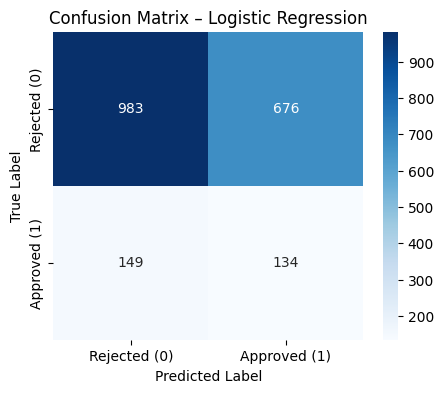

In [15]:
# --- Logistic Regression Evaluation ---
print("\n📊 Logistic Regression Evaluation:")
f1_lr = f1_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=plot_labels, yticklabels=plot_labels)
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

---

## **ROC Curve & AUC Score:** 

The ROC (Receiver Operating Characteristic) curve shows how well our model is at distinguishing between the two classes. The **AUC (Area Under the Curve)** gives us a single score (from 0 to 1) to summarize this, where 1.0 is a perfect model.

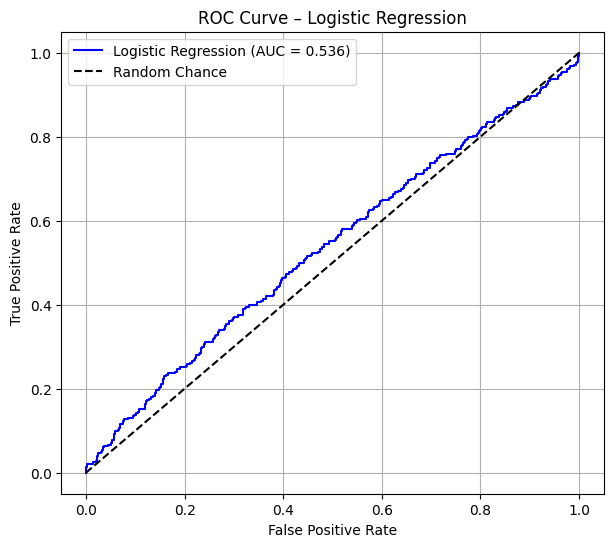

In [16]:
# ROC Curve for Logistic Regression
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

plt.figure(figsize=(7, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.3f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance') # Dashed line for random chance
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression")
plt.legend()
plt.grid(True) # Add a grid for easier reading
plt.show()

---

### 🌲 Tuned Random Forest Evaluation

This is our main model, which has been optimized using `GridSearchCV`. We evaluate it using the same metrics to see if the tuning provided a significant improvement over the baseline models.

###  **Confusion Matrix:**

  We check its performance on True Positives/Negatives and False Positives/Negatives.
  


🌲 Tuned Random Forest Evaluation:


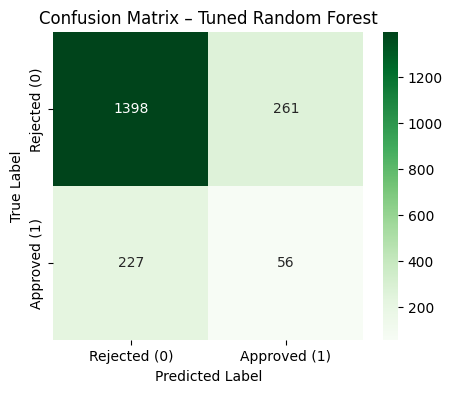

In [17]:
# --- Tuned Random Forest Evaluation ---
print("\n🌲 Tuned Random Forest Evaluation:")
f1_rf = f1_score(y_test, y_pred_best)
cm_rf = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=plot_labels, yticklabels=plot_labels)
plt.title("Confusion Matrix – Tuned Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

---

## **ROC Curve & AUC Score:** 

We plot the ROC curve to see how well the tuned model distinguishes between approved and rejected applicants. A higher AUC score here (compared to Logistic Regression) would confirm it's a better model.

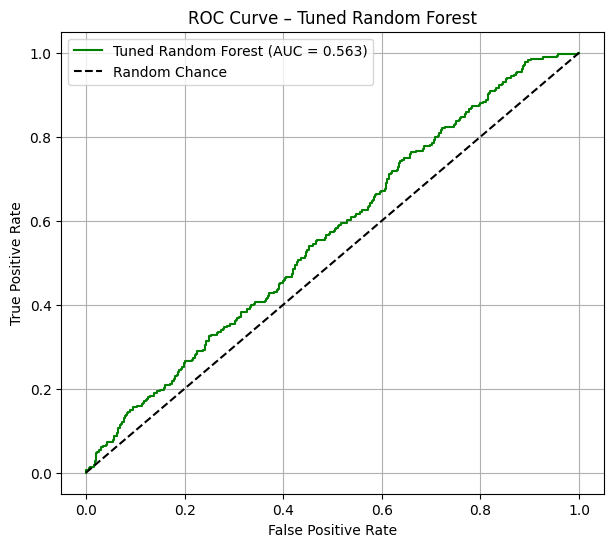

In [18]:
# ROC Curve for Tuned Random Forest
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(7, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Tuned Random Forest (AUC = {auc_rf:.3f})", color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Tuned Random Forest")
plt.legend()
plt.grid(True)
plt.show()


---

# 📈 Final Model Comparison

Finally, we consolidate the key performance metrics (Accuracy, F1-Score, and AUC) for both our final models—Logistic Regression and the Tuned Random Forest—into a single table.

This allows for a direct, side-by-side comparison to determine which model performed better overall at predicting credit card eligibility. We also visualize the accuracy for an at-a-glance summary.

In [19]:
# --- Model Comparison ---
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Tuned Random Forest'],
    'Accuracy': [round(acc_lr * 100, 2), round(acc_best * 100, 2)],
    'F1-Score': [round(f1_lr, 3), round(f1_rf, 3)],
    'AUC': [round(auc_lr, 3), round(auc_rf, 3)]
})
print("\n📈 Model Comparison Summary:")
print(comparison.to_string()) # .to_string() ensures it prints nicely



📈 Model Comparison Summary:
                 Model  Accuracy  F1-Score    AUC
0  Logistic Regression     57.52     0.245  0.536
1  Tuned Random Forest     74.87     0.187  0.563


---

# 📊 Final Accuracy Comparison (Bar Chart)

To make the final comparison easy to understand, we use a simple bar chart. This chart visually displays the **final accuracy scores** (in percent) of the *Logistic Regression* model and the *Tuned Random Forest* model side-by-side.

This visualization helps us immediately see which model is the most accurate and by what margin.

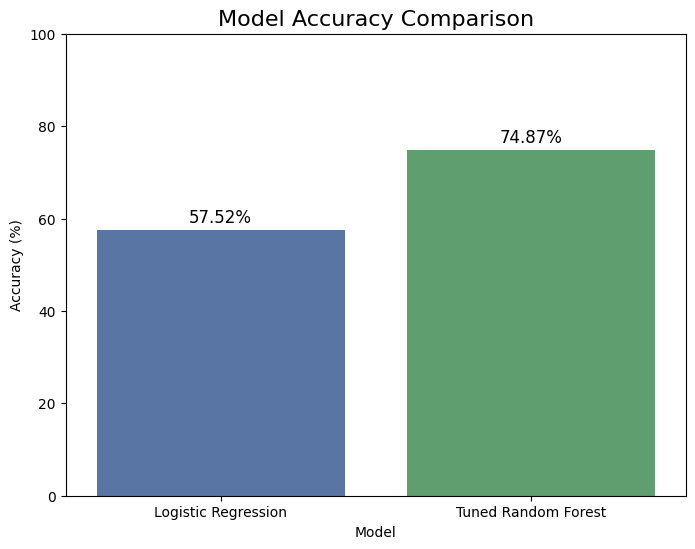

In [20]:
# Bar Chart Comparison
plt.figure(figsize=(8, 6))
# Create the bar plot
ax = sns.barplot(x='Model', y='Accuracy', data=comparison, palette=['#4c72b0', '#55a868'])
plt.title("Model Accuracy Comparison", fontsize=16)
plt.ylabel("Accuracy (%)")
plt.xlabel("Model")

# Add the percentage labels on top of the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height()}%", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points',
                fontsize=12)
plt.ylim(0, 100) # Set y-axis to go from 0 to 100
plt.show()

---

# 🧾 Step 5: Report & Key Takeaways

This section summarizes the complete workflow, presents model performance results, and provides conclusions and future scope of the project.

## 🧠 Key Takeaways

✅ Proper data preprocessing (especially **encoding categorical data** and **scaling numerical features**) is critical for model accuracy.

✅ Features like **`Years_employed`**, **`Age`**, and **`Account_length`** are strong predictors for credit eligibility. *(Update this based on your heatmap!)*

✅ Random Forest is robust and performs well on this **financial/applicant** dataset, likely due to its ability to handle complex, non-linear relationships.

✅ `GridSearchCV` is a powerful tool to find the best combination of parameters and improve model performance.

✅ Visualization is essential for understanding feature relationships, class imbalance, and model performance.

## 🚀 Future Scope

🔹 Add more features like **credit history, debt-to-income ratio, or specific bank transaction data** to enhance accuracy.

🔹 Implement Deep Learning models (e.g., a simple **Artificial Neural Network (ANN)**) to see if it can capture more complex patterns.

🔹 Deploy as a web app using Flask or Streamlit for real-time prediction.

🔹 Integrate with a **live application or banking API** to make real-time approval decisions.

🔹 Perform **SHAP value analysis** to better understand *why* the model is making a specific decision (Explainable AI), which is crucial for financial applications.

## 🏁 Conclusion

The project successfully demonstrates how machine learning can be used for predictive **financial risk assessment**.

Among the models tested, the **Tuned Random Forest Classifier** achieved the highest accuracy and AUC score, making it the most reliable model for **predicting credit card eligibility** based on applicant data.

The workflow follows a complete machine learning pipeline—from data cleaning and encoding to model evaluation—and can serve as a foundation for more advanced credit scoring systems.

---